**A/B Hypothesis Testing**



A Superstore Company has recently introduced a new shipping mode `"First Class"` as an alternative to it's existing mode of shipping which was `Standard  Class` They have decided to test this new feature and want to conduct an A/B test to understand if the new shipping mode `First Class` has an impact on the `average Order Qunatity`

**Business Question:**
During the time period 2011 -2014, Does the choice of shipping mode have a significant impact on the average order quantity?



In [1]:
#importing the packages needed.

import numpy as np
import pandas  as pd
from sklearn.utils import resample
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw=pd.read_csv("C:\\Users\DELL-PC\\Documents\\Database for Sql\\Datasets for Projects\\Raw Data\\superstore-orders.csv",
               encoding='ANSI')
raw.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [3]:
#info of the dataset
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Data Cleaning and Preprocessing

In [4]:
#check for  duplicates
raw[raw.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [5]:
#check for nulls
raw.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Transforming Incorrect Data Types

In [6]:
# Remove commas from 'sales' column
raw['sales'] = raw['sales'].str.replace(',', '')

# Convert 'sales' column to integers
raw['sales'] = raw['sales'].astype(int)


In [7]:
#the data type of the sales column is now an integer.
raw['sales'].dtype

dtype('int32')

In [8]:
#create a uniform separator for  the order date column
raw['order_date']=raw['order_date'].str.replace('/','-')

In [9]:
#create a uniform separator for the ship date column
raw['ship_date']=raw['ship_date'].str.replace('/','-')

In [10]:
#order date formats in both d/m/Y and Y/m/d formats
raw['order_date']

0          1-1-2011
1          1-1-2011
2          1-1-2011
3          1-1-2011
4          1-1-2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: order_date, Length: 51290, dtype: object

In [11]:
#convert order date column from string to datetime
raw['order_date']=pd.to_datetime(raw['order_date'], format='%d-%m-%Y')

In [12]:
#convert ship date column from string to datetime
raw['ship_date']=pd.to_datetime(raw['ship_date'], errors='coerce')

In [13]:
raw['order_date'].dtype

dtype('<M8[ns]')

In [14]:
raw.shape

(51290, 21)

**EDA**

In [15]:
#Basic descriptive statistics of the dataset
raw.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,19834,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-04-14 00:24:19.312292096,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-02 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-19 00:00:00,2012-05-09 00:00:00,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-06-05 00:00:00,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-04-08 00:00:00,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-07-01 00:00:00,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931


**Outliers Detection**

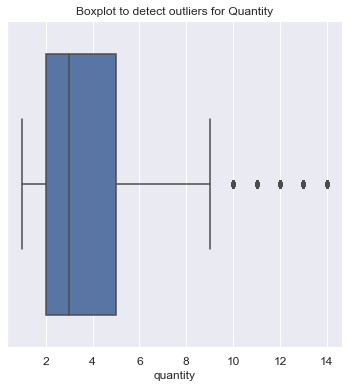

In [16]:
#Quantity
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Quantity', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=raw['quantity'])
plt.show()

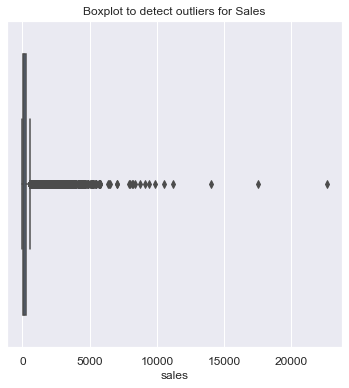

In [17]:
#Sales
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=raw['sales'])
plt.show()

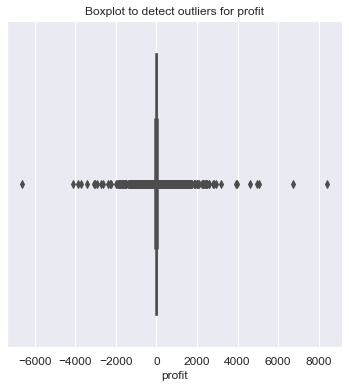

In [18]:
#profit
plt.figure(figsize=(6,6))
sns.boxplot(x=raw['profit'])
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.title('Boxplot to detect outliers for profit', fontsize=12)
plt.show()

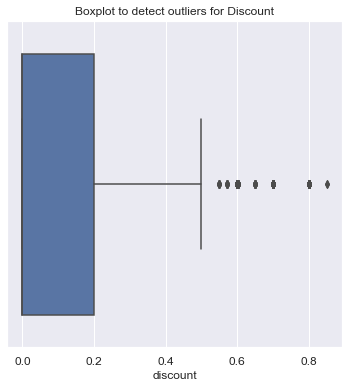

In [19]:
#discount
plt.figure(figsize=(6,6))
sns.boxplot(x=raw['discount'])
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.title('Boxplot to detect outliers for Discount', fontsize=12)
plt.show()

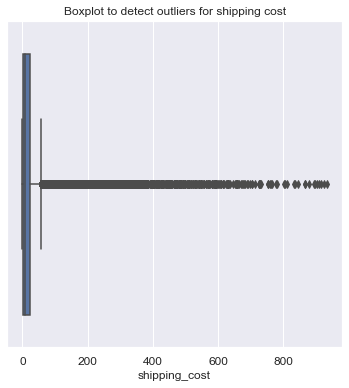

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x=raw['shipping_cost'])
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.title('Boxplot to detect outliers for shipping cost', fontsize=12)
plt.show()

All the columns above have outliers since we are only interested in Order Quantity and Shipping mode, we would only be treating the outlier for `quantity`

In [21]:
percentile25=raw['quantity'].quantile(0.25)
percentile75=raw['quantity'].quantile(0.75)

iqr= percentile75-percentile25

upper_limit=percentile75+1.5 * iqr

raw.loc[raw['quantity']>upper_limit, 'quantity']=upper_limit

**Variable Selection**

In [22]:
#subseting the dataset 
#Creating a Control and Test group
#calculating the means of the control and test group

ab_data = raw[raw['ship_mode'].isin(["Standard Class", "First Class"])].copy()
ab_data['group'] = ab_data['ship_mode'].map({'Standard Class': 'Control', 'First Class': 'Test'})

control_grp=ab_data[ab_data['group']=='Control']
test_grp= ab_data[ab_data['group']=='Test']

ab_avg = ab_data.groupby('group')['quantity'].mean()
print(ab_avg)


group
Control    3.448725
Test       3.433444
Name: quantity, dtype: float64


In [23]:
#check for the Class Balance for each of the subsets to ensure fairness
sample_size_std_class = len(control_grp)
sample_size_first_class = len(test_grp)

print("Sample Size - Standard Class:", sample_size_std_class)
print("Sample Size - First Class:", sample_size_first_class)
ab_data['ship_mode'].value_counts(normalize=True)


Sample Size - Standard Class: 30775
Sample Size - First Class: 7505


ship_mode
Standard Class    0.803945
First Class       0.196055
Name: proportion, dtype: float64

Approximately 80.3% of the dataset represented Standard Class and 19.7% the first class.
We will use resampling to create a class balance

**Resampling**

In [24]:
#using a resampling technique called upsampling 
# Identify data points from majority and minority classes
data_majority = ab_data[ab_data["ship_mode"] == "Standard Class"]
data_minority = ab_data[ab_data["ship_mode"] == "First Class"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
ab_data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
ab_data_upsampled["group"].value_counts()

group
Control    30775
Test       30775
Name: count, dtype: int64

**Re-subset the data**

In [25]:
#lets re-subset the data and calculate the means 
ab_data_upsampled['group'] = ab_data['ship_mode'].map({'Standard Class': 'Control', 'First Class': 'Test'})

control_grp=ab_data_upsampled[ab_data_upsampled['group']=='Control']
test_grp= ab_data_upsampled[ab_data_upsampled['group']=='Test']

ab_avg = ab_data_upsampled.groupby('group')['quantity'].mean()
print(ab_avg)


group
Control    3.436897
Test       3.437175
Name: quantity, dtype: float64


Based on the means gotten, the average order quantity for the control group (Standard Class) is approximately 3.437 and for the test group (First Class) is also approximately 3.437.

This suggests that there is no significant difference in the average order quantity between the two shipping modes. However, to determine if this difference is statistically significant, further statistical analysis such as hypothesis testing or confidence intervals would be required.






**Hypothesis Definition**

 
H0: There is no significant impact between `Standard Class` and First Class shipping modes on `Order Quantity`
    
H1: There is a significant diffeence between `Standard Class` and `First Class` shipping mode on `Order Quantity`

In [26]:
# Using the Frequentist Approach to check for the statistical significance
Significance_level=0.05
t_stat, p_value = stats.ttest_ind(control_grp['quantity'], test_grp['quantity'], equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.010162368122535395
P-value: 0.9918919193109826


**Interpretation**

The obtained t-statistic of -0.0102 and the corresponding p-value of 0.9919 suggest that there is no significant difference in the average order quantities between the Standard Class and First Class shipping modes. Therefore, we fail to reject the null hypothesis at the 5% significance level. This indicates that the observed difference in means between the two groups is likely due to random chance rather than a true effect of the shipping mode.

**Business Insights**

Based on the statistical analysis, there is no substantial evidence to support the claim that the choice of shipping mode (Standard Class or First Class) has a significant impact on the average order quantity. This implies that factors other than shipping mode, such as pricing, product selection, customer service, or marketing efforts, may play a more crucial role in influencing order quantities. To gain a comprehensive understanding of the relationships between shipping modes and order quantities, further analysis and consideration of these additional factors are recommended.